# Financial Report

## Objective

Generate an HTML financial report using existing python libraries available. The report should have the historical performance of the different symbols included in the data set. Additionally, a liquidity analysis should be done for the top10 biggest coins by market capitalization based on the list from https://coinmarketcap.com/.
    
## Data provided

Candle data and volume by market. (market is the combination of symbol and exchange where is traded, e.g. btc-usd-coinbase)     


## Libraries used
   #### pandas
   #### numpy
   #### matplotlib
   #### jinja2
   #### keras LSTM
   #### sklearn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Vinter coin data.csv")

In [3]:
data.head()

,id,created_at,open,high,low,price,volume,amount,symbol,exchange,timestamp,date
0,722202,2021-09-12 07:48:47,0.0000,0.0000,0.0000,0.000,0.00,NaN,alpha-usdt,okex,1544400000000,2018-12-10
1,737217,2021-09-12 07:52:12,0.0365,0.0371,0.0349,0.036,44107.49,1225208.056,lrc-usdt,okex,1544400000000,2018-12-10
2,729209,2021-09-12 07:51:11,0.0000,0.0000,0.0000,0.000,0.00,NaN,lrc-usd,kraken,1544400000000,2018-12-10
3,725205,2021-09-12 07:49:25,0.0000,0.0000,0.0000,0.000,0.00,NaN,gno-usdt,binance,1544400000000,2018-12-10
4,718198,2021-09-12 07:47:40,0.0000,0.0000,0.0000,0.000,0.00,NaN,xvs-usdt,poloniex,1544400000000,2018-12-10


### Data transformation

#### Changing date format correctly

In [4]:
data['created_at'] = pd.to_datetime(data['created_at'])
data['date'] = pd.to_datetime(data['date'])

In [5]:
data.dtypes

id                     int64
created_at    datetime64[ns]
open                 float64
high                 float64
low                  float64
price                float64
volume               float64
amount               float64
symbol                object
exchange              object
timestamp              int64
date          datetime64[ns]
dtype: object

In [6]:
data.describe()

,id,open,high,low,price,volume,amount,timestamp
count,837641.000000,8.376410e+05,8.376410e+05,8.376410e+05,8.376410e+05,8.376390e+05,4.289390e+05,8.376410e+05
mean,437840.000000,6.624918e+03,1.783694e+04,6.593647e+03,6.625984e+03,1.136804e+07,8.455479e+07,1.587902e+12
std,241806.272754,1.633558e+05,9.410764e+06,1.633494e+05,1.633547e+05,1.146863e+08,1.859976e+09,2.514086e+10
min,19020.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.544400e+12
25%,228430.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.150728e+03,1.566086e+12
50%,437840.000000,5.610000e-03,5.901000e-03,5.275000e-03,5.640000e-03,0.000000e+00,6.353086e+04,1.587859e+12
75%,647250.000000,5.787000e+00,6.101000e+00,5.488000e+00,5.807000e+00,5.484390e+05,1.756735e+06,1.609632e+12
max,856660.000000,6.991611e+06,8.575500e+09,6.991611e+06,6.991611e+06,1.759856e+10,4.577126e+11,1.631405e+12


#### Find missing values in the dataset

In [7]:
data.isnull().sum()

id                 0
created_at         0
open               0
high               0
low                0
price              0
volume             2
amount        408702
symbol             0
exchange           0
timestamp          0
date               0
dtype: int64

#### To filter out the volume data with 0.0 value

In [8]:
data_nonzero_volume = data[data['volume']!=0.0]

In [9]:
data_nonzero_volume.head()

,id,created_at,open,high,low,price,volume,amount,symbol,exchange,timestamp,date
1,737217,2021-09-12 07:52:12,0.0365,0.0371,0.0349,0.0360,44107.49,1225208.056,lrc-usdt,okex,1544400000000,2018-12-10
12,723203,2021-09-12 07:48:56,14.5000,14.5200,12.0000,12.1900,85498.33,7013.809,gno-usd,kraken,1544400000000,2018-12-10
26,750230,2021-09-12 07:55:36,0.3285,0.3320,0.3035,0.3100,646292.56,2084814.710,zrx-usd,coinbase,1544400000000,2018-12-10
35,759239,2021-09-12 07:56:40,0.3290,0.3321,0.3065,0.3118,76289.25,244673.669,zrx-usdt,okex,1544400000000,2018-12-10
37,758238,2021-09-12 07:56:37,0.3270,0.3270,0.3057,0.3128,6730.28,21516.240,zrx-usdt,poloniex,1544400000000,2018-12-10


In [10]:
data_nonzero_volume.describe()

,id,open,high,low,price,volume,amount,timestamp
count,394814.000000,3.948140e+05,3.948140e+05,3.948140e+05,394814.000000,3.948120e+05,3.948120e+05,3.948140e+05
mean,420910.180452,1.489785e+03,2.527731e+04,1.423441e+03,1492.046188,2.411860e+07,9.186359e+07,1.600706e+12
std,238736.917420,7.030522e+03,1.370542e+07,6.655222e+03,6975.946335,1.661265e+08,1.938524e+09,2.342079e+10
min,19676.000000,2.000000e-08,1.814000e-04,2.000000e-08,0.000110,8.000000e-08,0.000000e+00,1.544400e+12
25%,210293.250000,3.982000e-01,4.258000e-01,3.750000e-01,0.399800,6.892069e+04,5.311226e+03,1.584749e+12
50%,412504.500000,4.388000e+00,4.631000e+00,4.160000e+00,4.399000,7.098228e+05,1.044367e+05,1.606522e+12
75%,634070.750000,7.381000e+01,7.711750e+01,7.102000e+01,73.967500,6.455944e+06,2.342291e+06,1.620173e+12
max,856660.000000,6.080900e+05,8.575500e+09,6.988800e+04,83016.550000,1.759856e+10,4.577126e+11,1.631405e+12


In [11]:
data_nonzero_volume_null = data_nonzero_volume[data_nonzero_volume['volume'].isnull()]

In [12]:
data_nonzero_volume_null.describe()

,id,open,high,low,price,volume,amount,timestamp
count,2.000000,2.000000,2.000000,2.000000,2.000000,0.0,0.0,2.000000e+00
mean,139654.500000,95.652100,96.207100,92.366250,93.411850,NaN,NaN,1.584878e+12
std,38414.990102,135.068567,135.853456,130.424078,131.901083,NaN,NaN,1.667867e+10
min,112491.000000,0.144200,0.144200,0.142500,0.143700,NaN,NaN,1.573085e+12
25%,126072.750000,47.898150,48.175650,46.254375,46.777775,NaN,NaN,1.578982e+12
50%,139654.500000,95.652100,96.207100,92.366250,93.411850,NaN,NaN,1.584878e+12
75%,153236.250000,143.406050,144.238550,138.478125,140.045925,NaN,NaN,1.590775e+12
max,166818.000000,191.160000,192.270000,184.590000,186.680000,NaN,NaN,1.596672e+12


#### remove missing data from the 'new nonzero volume dataset'

In [13]:
data_nonzero_volume_notnull = data_nonzero_volume[data_nonzero_volume['volume'].notnull()]

In [14]:
data_nonzero_volume_notnull.describe()

,id,open,high,low,price,volume,amount,timestamp
count,394812.000000,3.948120e+05,3.948120e+05,3.948120e+05,394812.000000,3.948120e+05,3.948120e+05,3.948120e+05
mean,420911.605210,1.489792e+03,2.527744e+04,1.423448e+03,1492.053274,2.411860e+07,9.186359e+07,1.600706e+12
std,238736.675019,7.030539e+03,1.370546e+07,6.655239e+03,6975.963291,1.661265e+08,1.938524e+09,2.342081e+10
min,19676.000000,2.000000e-08,1.814000e-04,2.000000e-08,0.000110,8.000000e-08,0.000000e+00,1.544400e+12
25%,210294.750000,3.982000e-01,4.258000e-01,3.750000e-01,0.399800,6.892069e+04,5.311226e+03,1.584749e+12
50%,412505.500000,4.388000e+00,4.631000e+00,4.160000e+00,4.399000,7.098228e+05,1.044367e+05,1.606522e+12
75%,634071.250000,7.381000e+01,7.711250e+01,7.102000e+01,73.962500,6.455944e+06,2.342291e+06,1.620173e+12
max,856660.000000,6.080900e+05,8.575500e+09,6.988800e+04,83016.550000,1.759856e+10,4.577126e+11,1.631405e+12


In [15]:
data_nonzero_volume_notnull.head()

,id,created_at,open,high,low,price,volume,amount,symbol,exchange,timestamp,date
1,737217,2021-09-12 07:52:12,0.0365,0.0371,0.0349,0.0360,44107.49,1225208.056,lrc-usdt,okex,1544400000000,2018-12-10
12,723203,2021-09-12 07:48:56,14.5000,14.5200,12.0000,12.1900,85498.33,7013.809,gno-usd,kraken,1544400000000,2018-12-10
26,750230,2021-09-12 07:55:36,0.3285,0.3320,0.3035,0.3100,646292.56,2084814.710,zrx-usd,coinbase,1544400000000,2018-12-10
35,759239,2021-09-12 07:56:40,0.3290,0.3321,0.3065,0.3118,76289.25,244673.669,zrx-usdt,okex,1544400000000,2018-12-10
37,758238,2021-09-12 07:56:37,0.3270,0.3270,0.3057,0.3128,6730.28,21516.240,zrx-usdt,poloniex,1544400000000,2018-12-10


#### check duplicated rows in the dataset 

In [16]:
data_nonzero_volume_notnull.duplicated().sum()

0

#### check dupliacted data for symbol, exchange and date 

In [17]:
data_nonzero_volume_notnull.duplicated('symbol').sum()

394610

### This confirms that there are no duplicate entries for a symbol on the same exchange and date

# COIN VALUE ANALYSIS

### Coin value irrespective of date

#### create a dataframe for coin volume analysis

In [18]:

cvd_overall = data_nonzero_volume_notnull[['volume','amount','symbol','exchange','date']].copy()
cvd_overall.head()

,volume,amount,symbol,exchange,date
1,44107.49,1225208.056,lrc-usdt,okex,2018-12-10
12,85498.33,7013.809,gno-usd,kraken,2018-12-10
26,646292.56,2084814.710,zrx-usd,coinbase,2018-12-10
35,76289.25,244673.669,zrx-usdt,okex,2018-12-10
37,6730.28,21516.240,zrx-usdt,poloniex,2018-12-10


#### summation of volume and amount by symbol

In [19]:

cvd_symbol = cvd_overall.groupby(['symbol']).sum()
print(cvd_symbol.head())
print('*******')
print(cvd_symbol.count())

                  volume        amount
symbol                                
1inch-usd   1.827785e+09  4.631508e+08
1inch-usdt  1.757154e+10  5.106449e+09
aave-usd    1.141186e+10  3.335268e+07
aave-usdt   4.245359e+10  1.469530e+08
ada-usd     5.263083e+10  4.426803e+10
*******
volume    202
amount    202
dtype: int64


In [20]:
cvd_symbol.reset_index(level=0, inplace=True) #removing index

In [21]:
cvd_symbol.head()

,symbol,volume,amount
0,1inch-usd,1.827785e+09,4.631508e+08
1,1inch-usdt,1.757154e+10,5.106449e+09
2,aave-usd,1.141186e+10,3.335268e+07
3,aave-usdt,4.245359e+10,1.469530e+08
4,ada-usd,5.263083e+10,4.426803e+10


In [22]:
cvd_symbol_10largest = cvd_symbol.nlargest(10, 'volume') #data frame for the top 10 coins by volume
cvd_symbol_10largest.head(10)

,symbol,volume,amount
36,btc-usdt,1.852455e+12,1.039677e+08
75,eth-usdt,9.191745e+11,1.216442e+09
35,btc-usd,9.181689e+11,4.742012e+07
74,eth-usd,5.061135e+11,5.405818e+08
63,doge-usdt,3.896979e+11,2.899633e+12
189,xrp-usdt,3.158699e+11,5.322994e+11
29,bnb-usdt,3.116835e+11,2.843222e+09
39,busd-usdt,2.740025e+11,2.741523e+11
5,ada-usdt,2.066473e+11,3.648576e+11
105,ltc-usdt,1.690100e+11,1.500677e+09


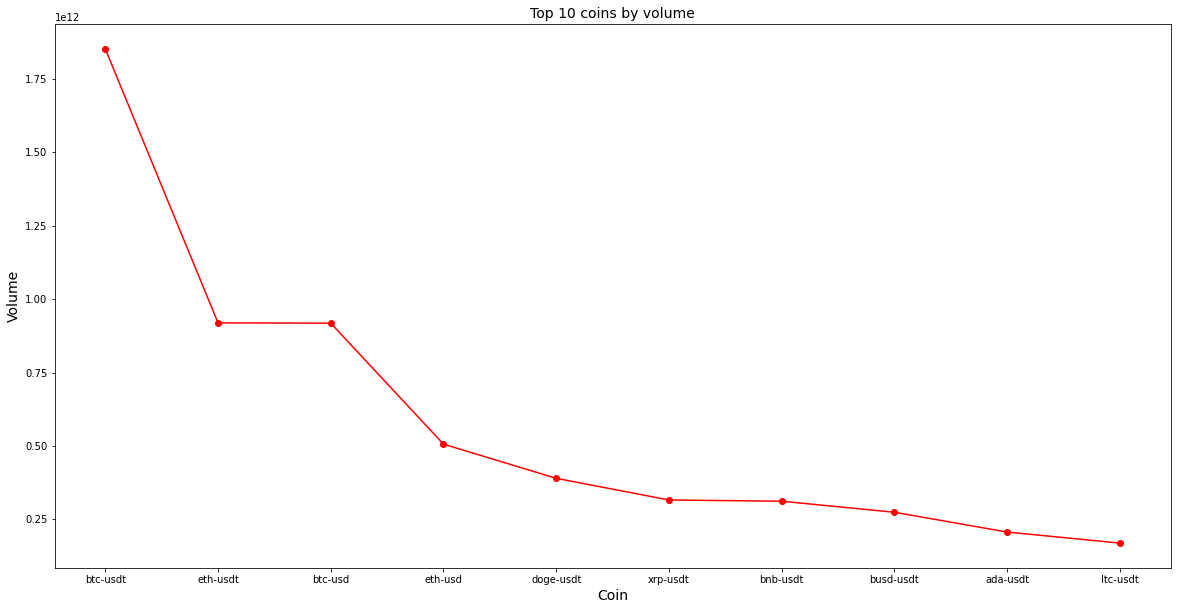

In [77]:
#plotting graph for the above dataframe
plt.plot(cvd_symbol_10largest['symbol'], cvd_symbol_10largest['volume'], color='red', marker='o')
plt.title('Top 10 coins by volume', fontsize=14)
plt.xlabel('Coin', fontsize=14)
plt.ylabel('Volume', fontsize=14)
plt.grid(False)
plt.rcParams["figure.figsize"] = (20,20)
plt.show()

### Coin value trends

In [24]:
#trend of top 10 coins by volume
cvd_date_symbol = cvd_overall.groupby(['symbol', 'date']).sum()
print(cvd_date_symbol.head())
print('*******')
print(cvd_date_symbol.count())

                         volume      amount
symbol    date                             
1inch-usd 2020-12-25  688956.44  299546.278
          2020-12-26  368834.05  230521.281
          2020-12-27  315502.71  300192.873
          2020-12-28  214739.46  192591.444
          2020-12-29  209758.50  235630.757
*******
volume    120790
amount    120790
dtype: int64


In [25]:
#removing indexes
cvd_date_symbol.reset_index(level=0, inplace=True)
cvd_date_symbol.reset_index(level=0, inplace=True)
cvd_date_symbol.head()

,date,symbol,volume,amount
0,2020-12-25,1inch-usd,688956.44,299546.278
1,2020-12-26,1inch-usd,368834.05,230521.281
2,2020-12-27,1inch-usd,315502.71,300192.873
3,2020-12-28,1inch-usd,214739.46,192591.444
4,2020-12-29,1inch-usd,209758.50,235630.757


In [26]:
cvd_10largestcoins_set = set(cvd_symbol_10largest['symbol']) #creating set of top 10 coins for plotting the graph

In [27]:
cvd_10largestcoins_set

{'ada-usdt',
 'bnb-usdt',
 'btc-usd',
 'btc-usdt',
 'busd-usdt',
 'doge-usdt',
 'eth-usd',
 'eth-usdt',
 'ltc-usdt',
 'xrp-usdt'}

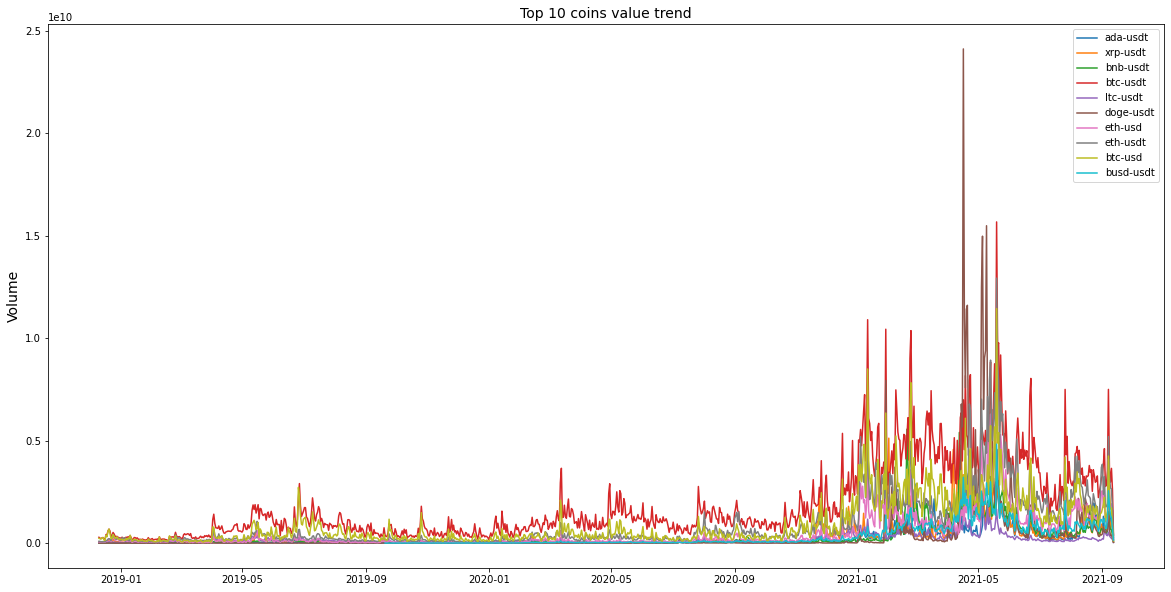

In [82]:
#plotting the graph for coin value trend
plt.rcParams["figure.figsize"] = (20,10)
plt.figure()
for coin in cvd_10largestcoins_set:
     subset_data = cvd_date_symbol[cvd_date_symbol['symbol'] == coin]
     plt.plot(subset_data['date'], subset_data['volume'], label=coin)
plt.title('Top 10 coins value trend', fontsize=14)     
plt.ylabel('Volume', fontsize=14)
plt.legend()
plt.show()

### Busiest trading exchange by volume

In [31]:
#create a data frame for exchange transactions by volume
cvd_exchange = cvd_overall.groupby(['exchange']).sum()
print(cvd_exchange.head())
print('*******')
print(cvd_exchange.count())

                volume        amount
exchange                            
binance   5.197742e+12  2.342534e+13
bitfinex  4.234506e+11  1.514295e+11
bitflyer  1.523090e+08  2.154339e+04
bitstamp  2.140488e+11  7.717207e+10
bittrex   4.825765e+10  9.173104e+10
*******
volume    14
amount    14
dtype: int64


In [32]:
cvd_exchange.reset_index(level=0, inplace=True) #removing the index
cvd_exchange.head()

,exchange,volume,amount
0,binance,5.197742e+12,2.342534e+13
1,bitfinex,4.234506e+11,1.514295e+11
2,bitflyer,1.523090e+08,2.154339e+04
3,bitstamp,2.140488e+11,7.717207e+10
4,bittrex,4.825765e+10,9.173104e+10


In [33]:
cvd_exchange_10largest = cvd_exchange.nlargest(10, 'volume') #data frame with top 10 exchange 
cvd_exchange_10largest.head(10)

,exchange,volume,amount
0,binance,5.197742e+12,2.342534e+13
12,okex,1.759211e+12,1.087221e+13
5,coinbase,9.610118e+11,3.736853e+11
1,bitfinex,4.234506e+11,1.514295e+11
6,ftx,3.365937e+11,8.638993e+10
9,kraken,3.204602e+11,1.774064e+11
3,bitstamp,2.140488e+11,7.717207e+10
10,kucoin,1.002032e+11,2.994203e+11
7,gemini,7.831362e+10,3.051287e+10
13,poloniex,5.310509e+10,6.810441e+11


#### plotting graph for 10 busiest exchanges from the above data frame

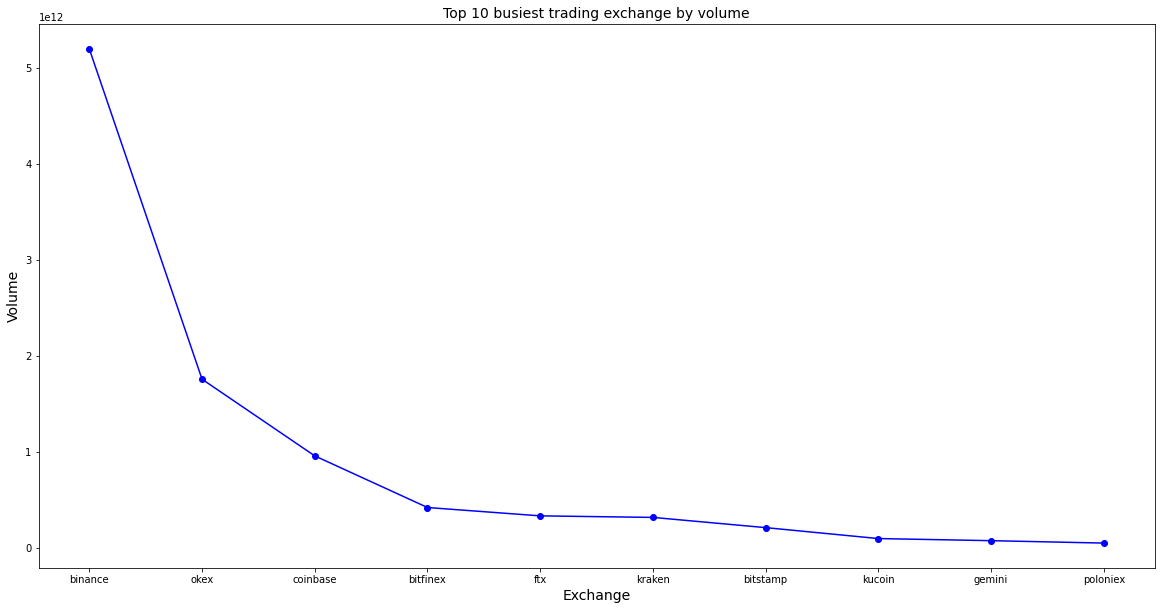

In [34]:
plt.plot(cvd_exchange_10largest['exchange'], cvd_exchange_10largest['volume'], color='blue', marker='o')
plt.title('Top 10 busiest trading exchange by volume', fontsize=14)
plt.xlabel('Exchange', fontsize=14)
plt.ylabel('Volume', fontsize=14)
plt.grid(False)
plt.rcParams["figure.figsize"] = (20,2)
plt.show()

### Busiest Trading Exchange Trends

#### creating dataframe by exchange and date

In [35]:
cvd_date_exchange = cvd_overall.groupby(['exchange', 'date']).sum()
print(cvd_date_exchange.head())
print('*******')
print(cvd_date_exchange.count())

                           volume        amount
exchange date                                  
binance  2018-12-10  2.549046e+08  1.018393e+09
         2018-12-11  2.162079e+08  7.873040e+08
         2018-12-12  1.993654e+08  8.583529e+08
         2018-12-13  2.269489e+08  7.577947e+08
         2018-12-14  2.334772e+08  7.715654e+08
*******
volume    13013
amount    13013
dtype: int64


#### removing the indexes

In [36]:
cvd_date_exchange.reset_index(level=0, inplace=True)
cvd_date_exchange.reset_index(level=0, inplace=True)
cvd_date_exchange.head()

,date,exchange,volume,amount
0,2018-12-10,binance,2.549046e+08,1.018393e+09
1,2018-12-11,binance,2.162079e+08,7.873040e+08
2,2018-12-12,binance,1.993654e+08,8.583529e+08
3,2018-12-13,binance,2.269489e+08,7.577947e+08
4,2018-12-14,binance,2.334772e+08,7.715654e+08


#### creating set of the top 10 exchange by volume

In [37]:
cvd_10largestexchange_set = set(cvd_exchange_10largest['exchange'])
cvd_10largestexchange_set

{'binance',
 'bitfinex',
 'bitstamp',
 'coinbase',
 'ftx',
 'gemini',
 'kraken',
 'kucoin',
 'okex',
 'poloniex'}

#### plotting the graph for the above set

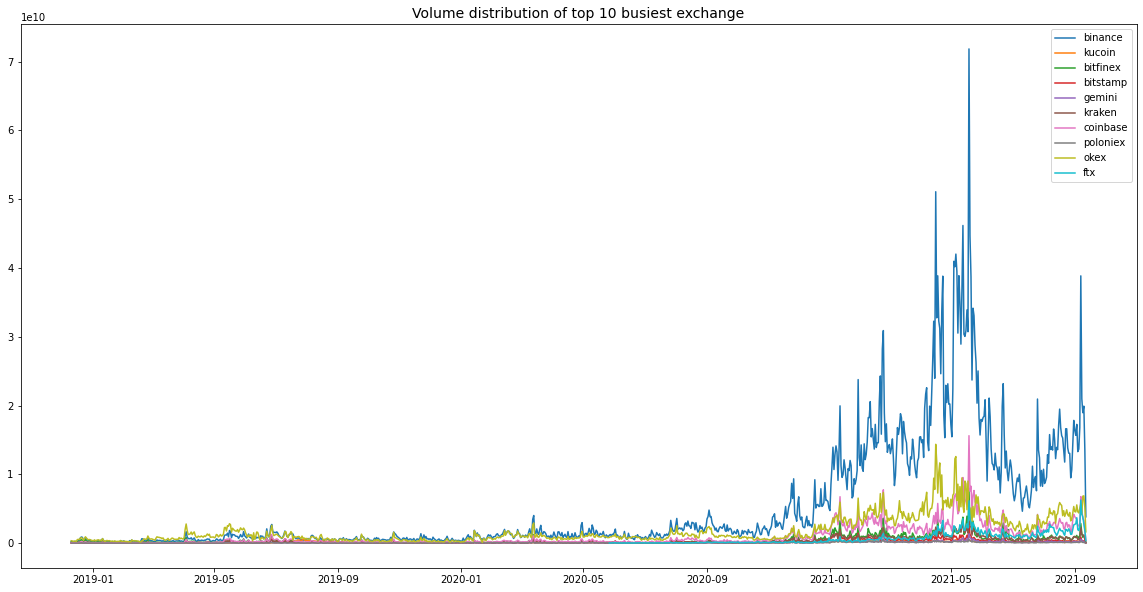

In [38]:
plt.rcParams["figure.figsize"] = (20,10)
plt.figure()
for exchange in cvd_10largestexchange_set:
     subset_data = cvd_date_exchange[cvd_date_exchange['exchange'] == exchange]
     plt.plot(subset_data['date'], subset_data['volume'], label=exchange)
plt.title('Volume distribution of top 10 busiest exchange', fontsize=14)     
plt.legend()
plt.show()

### Price fluctuations of top 10 coins on Binance exchange (noted as the busiest exchange)



In [39]:
priceflux = data_nonzero_volume_notnull[['symbol','price','date','exchange']].copy()
priceflux.head()

,symbol,price,date,exchange
1,lrc-usdt,0.0360,2018-12-10,okex
12,gno-usd,12.1900,2018-12-10,kraken
26,zrx-usd,0.3100,2018-12-10,coinbase
35,zrx-usdt,0.3118,2018-12-10,okex
37,zrx-usdt,0.3128,2018-12-10,poloniex


#### creating a data frame with data only for binance exchange

In [40]:
priceflux_binance = priceflux[priceflux['exchange'] == 'binance']
priceflux_binance.head()

,symbol,price,date,exchange
130,ont-usdt,0.5340,2018-12-10,binance
371,eos-usdt,1.9050,2018-12-10,binance
382,xlm-usdt,0.1155,2018-12-10,binance
434,miota-usdt,0.2270,2018-12-10,binance
435,bsv-usdt,93.8200,2018-12-10,binance


#### plotting the graph for the top 10 coins from the above data frame by price

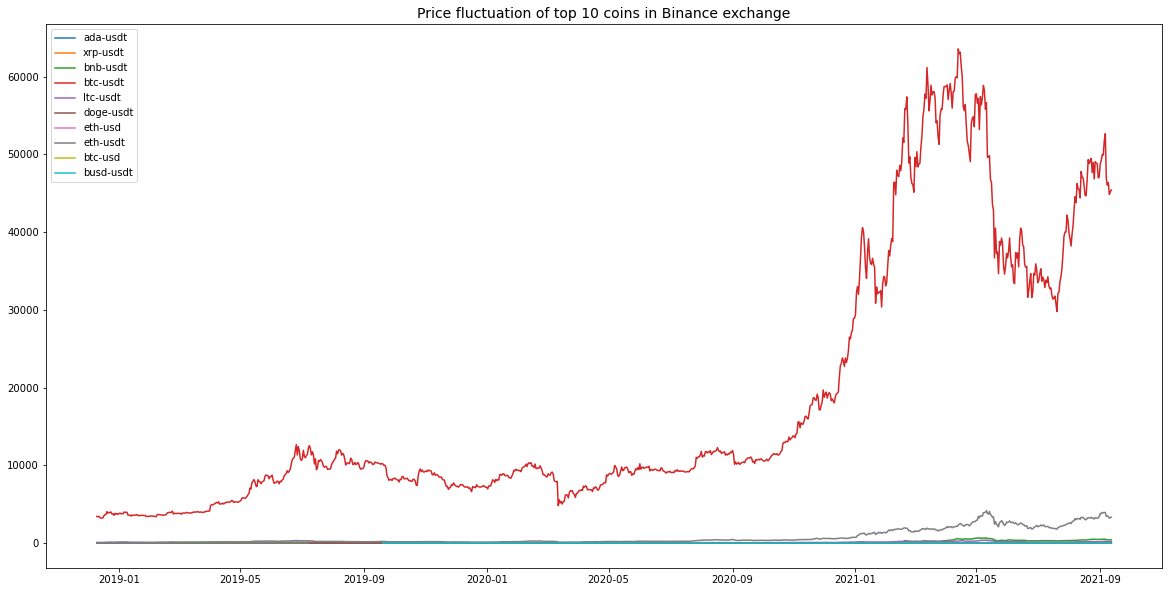

In [41]:
plt.rcParams["figure.figsize"] = (20,10)
plt.figure()
for coin in cvd_10largestcoins_set:
     subset_data = priceflux_binance[priceflux_binance['symbol'] == coin]
     plt.plot(subset_data['date'], subset_data['price'], label=coin)
plt.title('Price fluctuation of top 10 coins in Binance exchange', fontsize=14)     
plt.legend()
plt.show()

## Liquidity

Liquidity is used to as a metric to know how quickly an asset can be converted into cash.
It can be calculated by total trading volume of the coin per day divided by the price of the coin that day.

https://3commastutorials.medium.com/how-to-choose-a-coin-cryptocurrency-liquidity-a27400b77951#:~:text=In%20order%20to%20estimate%20liquidity,turnover%20of%20BTC%20per%20day.

In [42]:
liquidity = data_nonzero_volume_notnull[['symbol','volume','amount','exchange','price','date']].copy()

In [43]:
liquidity.head()

,symbol,volume,amount,exchange,price,date
1,lrc-usdt,44107.49,1225208.056,okex,0.0360,2018-12-10
12,gno-usd,85498.33,7013.809,kraken,12.1900,2018-12-10
26,zrx-usd,646292.56,2084814.710,coinbase,0.3100,2018-12-10
35,zrx-usdt,76289.25,244673.669,okex,0.3118,2018-12-10
37,zrx-usdt,6730.28,21516.240,poloniex,0.3128,2018-12-10


#### creating a new variable 'liquidity' which is volume/price

In [44]:
liquidity = liquidity.assign(liquidity = liquidity['volume']/liquidity['price'])

In [45]:
liquidity.head()

,symbol,volume,amount,exchange,price,date,liquidity
1,lrc-usdt,44107.49,1225208.056,okex,0.0360,2018-12-10,1.225208e+06
12,gno-usd,85498.33,7013.809,kraken,12.1900,2018-12-10,7.013809e+03
26,zrx-usd,646292.56,2084814.710,coinbase,0.3100,2018-12-10,2.084815e+06
35,zrx-usdt,76289.25,244673.669,okex,0.3118,2018-12-10,2.446737e+05
37,zrx-usdt,6730.28,21516.240,poloniex,0.3128,2018-12-10,2.151624e+04


#### created a dataframe by grouping the liquidity dataframe by symbol and date

In [46]:
liquidity_grouped = liquidity.groupby(['symbol','date']).median()

In [47]:
liquidity_grouped.head()

volume      amount   price      liquidity
symbol    date                                                    
1inch-usd 2020-12-25  688956.44  299546.278  2.3000  299546.278261
          2020-12-26  368834.05  230521.281  1.6000  230521.281250
          2020-12-27  315502.71  300192.873  1.0510  300192.873454
          2020-12-28  214739.46  192591.444  1.1150  192591.443946
          2020-12-29  209758.50  235630.757  0.8902  235630.757133

#### removing the indexes

In [48]:
liquidity_grouped.reset_index(level=0, inplace=True)
liquidity_grouped.reset_index(level=0, inplace=True)

In [49]:
liquidity_grouped.head()

,date,symbol,volume,amount,price,liquidity
0,2020-12-25,1inch-usd,688956.44,299546.278,2.3000,299546.278261
1,2020-12-26,1inch-usd,368834.05,230521.281,1.6000,230521.281250
2,2020-12-27,1inch-usd,315502.71,300192.873,1.0510,300192.873454
3,2020-12-28,1inch-usd,214739.46,192591.444,1.1150,192591.443946
4,2020-12-29,1inch-usd,209758.50,235630.757,0.8902,235630.757133


### Top 10 coins by market capitalization (Refer: https://coinmarketcap.com/)

In [51]:
liquidity_coin_set = {'btc-usdt','eth-usdt','ada-usdt','bnb-usdt','xrp-usdt','sol-usdt','usdc-usdt','dot-usdt','uni-usdt','doge-usdt'}

In [52]:
liquidity_coin_set

{'ada-usdt',
 'bnb-usdt',
 'btc-usdt',
 'doge-usdt',
 'dot-usdt',
 'eth-usdt',
 'sol-usdt',
 'uni-usdt',
 'usdc-usdt',
 'xrp-usdt'}

#### plotting the graph for liquidity history of top 10 coins by market capitalization across all exchanges

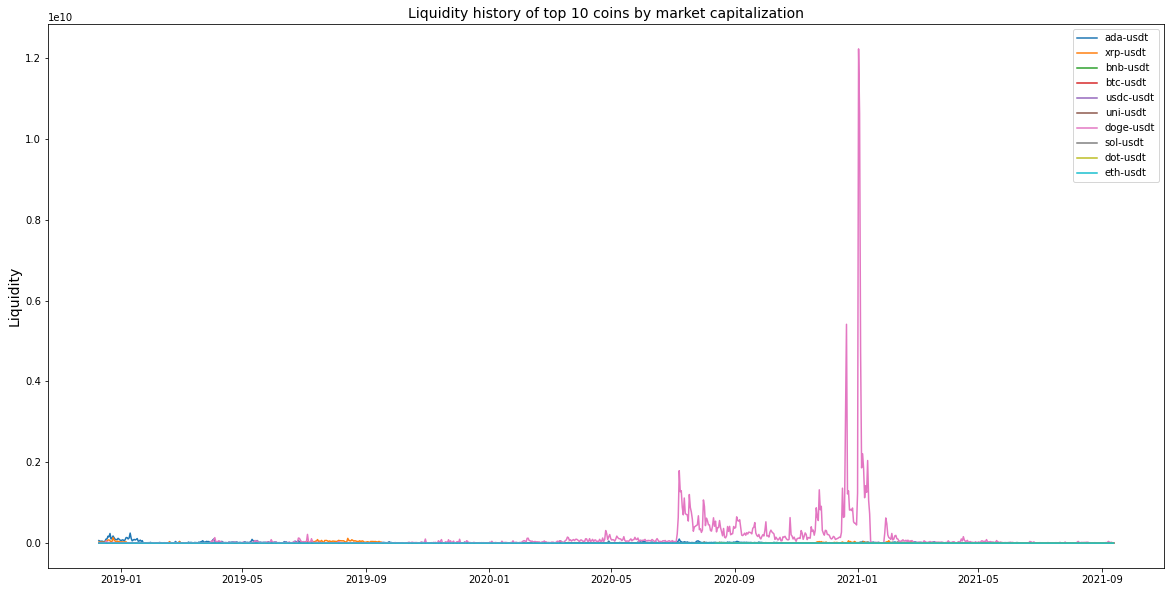

In [83]:
plt.rcParams["figure.figsize"] = (20,10)
plt.figure()

for coin in liquidity_coin_set:
     subset_data = liquidity_grouped[liquidity_grouped['symbol'] == coin]
     plt.plot(subset_data['date'], subset_data['liquidity'], label=coin)
plt.title('Liquidity history of top 10 coins by market capitalization', fontsize=14) 
plt.ylabel('Liquidity', fontsize=14)
plt.legend()
plt.show()

## Btc-usdt price prediction on Binance exchange

In [57]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
from sklearn.preprocessing import MinMaxScaler

In [58]:
btc_binance_data = data_nonzero_volume_notnull[(data_nonzero_volume_notnull['symbol'] == 'btc-usdt') & (data_nonzero_volume_notnull['exchange'] == 'binance')]

In [59]:
btc_binance_data.head()

,id,created_at,open,high,low,price,volume,amount,symbol,exchange,timestamp,date
776,91138,2021-09-12 03:42:30,3545.37,3610.0,3370.11,3432.88,1.306914e+08,38070.472,btc-usdt,binance,1544400000000,2018-12-10
1008,91139,2021-09-12 03:42:30,3432.88,3463.5,3324.32,3380.39,1.150706e+08,34040.626,btc-usdt,binance,1544486400000,2018-12-11
1757,91140,2021-09-12 03:42:30,3380.39,3492.0,3350.00,3445.00,1.078230e+08,31298.412,btc-usdt,binance,1544572800000,2018-12-12
2732,91141,2021-09-12 03:42:30,3445.00,3460.0,3255.50,3302.06,1.262094e+08,38221.426,btc-usdt,binance,1544659200000,2018-12-13
3704,91142,2021-09-12 03:42:30,3302.06,3335.0,3177.00,3224.17,1.335645e+08,41425.998,btc-usdt,binance,1544745600000,2018-12-14


No handles with labels found to put in legend.


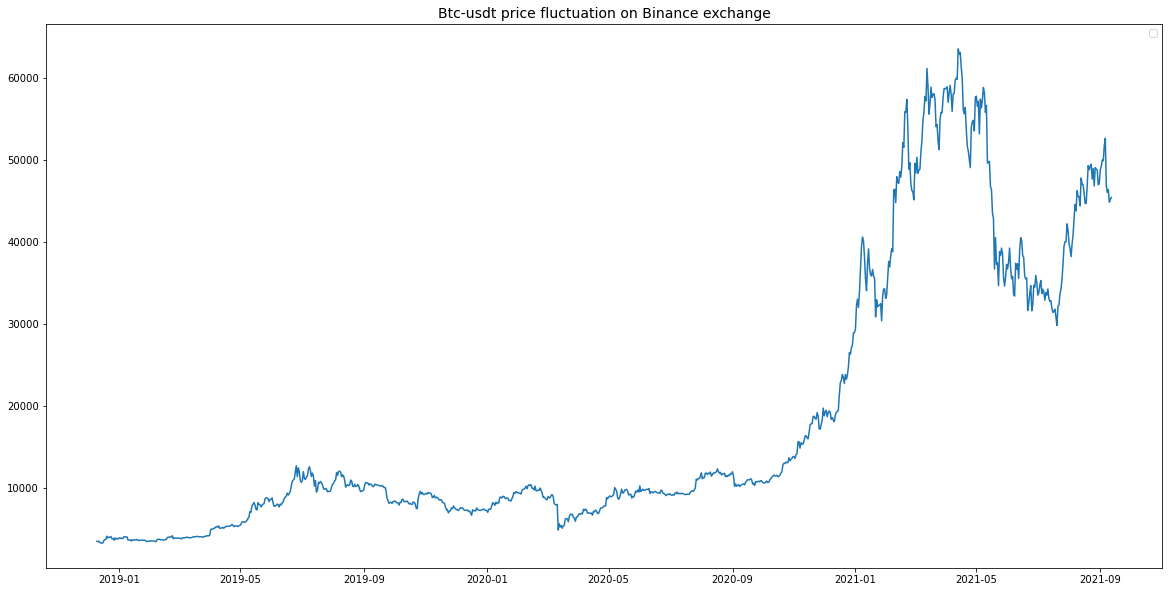

In [60]:
plt.rcParams["figure.figsize"] = (20,10)
plt.figure()
plt.plot(btc_binance_data['date'], btc_binance_data['price'])
plt.title('Btc-usdt price fluctuation on Binance exchange', fontsize=14)     
plt.legend()
plt.show()

In [61]:
#Creating training and test data
price_data = btc_binance_data.filter(['price'])

In [62]:
price_data.head()

,price
776,3432.88
1008,3380.39
1757,3445.00
2732,3302.06
3704,3224.17


In [63]:
price_dataset = price_data.values

In [64]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_price_data = scaler.fit_transform(price_dataset)

In [65]:
training_data_len = math.ceil(len(price_dataset) *.7)
train_data = scaled_price_data[0:training_data_len  , : ]

In [66]:
x_train_data=[]
y_train_data =[]
for i in range(60,len(train_data)):
    x_train_data=list(x_train_data)
    y_train_data=list(y_train_data)
    x_train_data.append(train_data[i-60:i,0])
    y_train_data.append(train_data[i,0])

In [67]:
x_train_data1, y_train_data1 = np.array(x_train_data), np.array(y_train_data)

In [68]:
x_train_data2 = np.reshape(x_train_data1, (x_train_data1.shape[0],x_train_data1.shape[1],1))

In [69]:
#building LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train_data2.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [70]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train_data2, y_train_data1, batch_size=1, epochs=1)

646/646 [==============================] - 18s 25ms/step - loss: 3.1910e-04


In [71]:
#creating dataset for testing
test_data = scaled_price_data[training_data_len - 60: , : ]
x_test = []
y_test =  price_dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [72]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [73]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [74]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
print(rmse)

3790.4098538349185


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


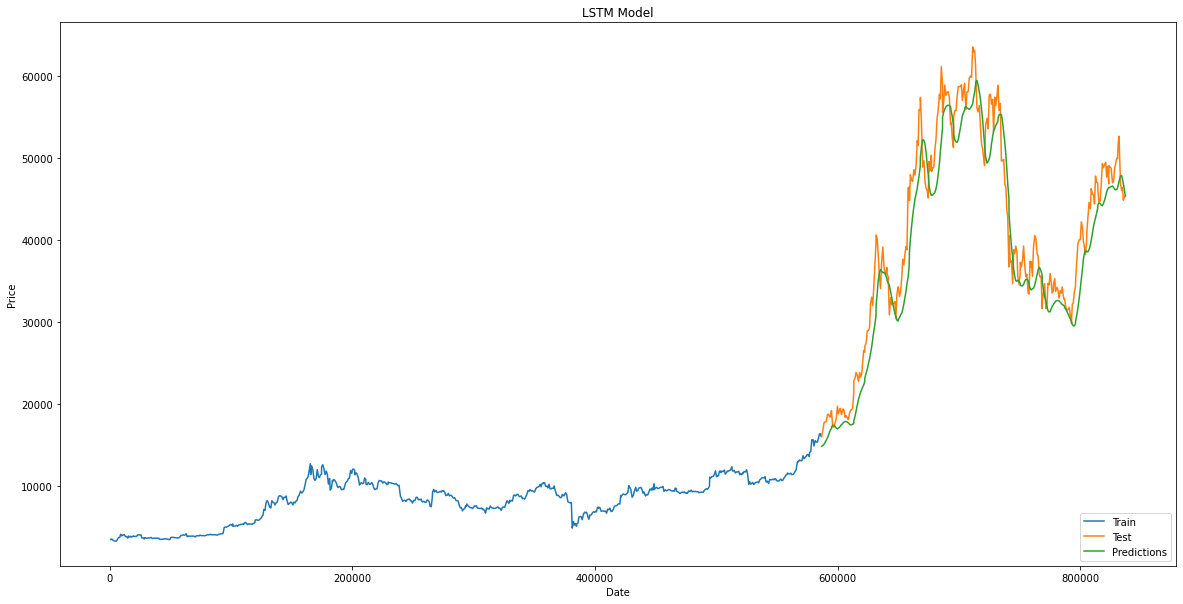

In [84]:
#plotting the prediction
train = btc_binance_data[:training_data_len]
valid = btc_binance_data[training_data_len:]
 
valid['Predictions'] = predictions
 
plt.title('LSTM Model')
plt.xlabel('Date')
plt.ylabel('Price')
 
plt.plot(train['price'])
plt.plot(valid[['price', 'Predictions']])
 
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
 
plt.show()

## Conclusion

### As observed through the analysis, binance is observed to be the busiest exchnage among all.
### BTC-USDT is the most traded coin by volume.
### A spike in the volume of all the top 10 coins can be observed during May 2021.
### The coin with highest liquidity was obsrved to be doge-usdt.
### The prediction done by our LSTM model is accurate. 

# following section creates a html report

In [86]:
import jinja2

env = jinja2.Environment(loader=jinja2.FileSystemLoader(searchpath=''))
template = env.get_template('template.html')

def color_negative_red(val):
    color = 'red' if str(val) < '0' else 'black'
    return f'color: {color}'

def color(val):
    color = 'black'
    return f'color: {color}'

styler = data_nonzero_volume_notnull.head(5).style.applymap(color)
html = template.render(my_table=styler.render())
with open('report.html', 'w') as f:
    f.write(html)